<a href="https://colab.research.google.com/github/gapself/machine-learning-projects/blob/main/data-analysis/student_data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data: https://archive.ics.uci.edu/ml/datasets/Student+Performance

In [7]:
students = pd.read_csv('./student-mat.csv', delimiter=';')
print(students.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


* school: the school each student attends, Gabriel Periera ('GP') or Mousinho da Silveria ('MS')
* address: the location of the student’s home ('U' for urban and 'R' for rural)
* absences: the number of times the student was absent during the 
* school year
* Mjob: the student’s mother’s job industry
* Fjob: the student’s father’s job industry
* G3: the student’s score on a math assessment, ranging from 0 to 20

In [8]:
# #separate out scores for students who live in urban and rural locations:
scores_urban = students.G3[students.address== 'U']
scores_rural = students.G3[students.address== 'R']

print(scores_urban)
print(scores_rural)

0       6
1       6
2      10
3      15
4      10
       ..
388     8
389     0
390     9
391    16
394     9
Name: G3, Length: 307, dtype: int64
24      8
32     16
37     15
38     11
39     13
       ..
385    10
386     6
387     0
392     7
393    10
Name: G3, Length: 88, dtype: int64


# Mean and Median Differences


In [11]:
#calculate means for each group:
scores_urban_mean = np.mean(scores_urban)
scores_rural_mean = np.mean(scores_rural)

#print mean scores:
print('Mean score - students w/ urban address:')
print(scores_urban_mean)
print('Mean score - students w/ rural address:')
print(scores_rural_mean)

#calculate mean difference:
mean_diff = scores_urban_mean - scores_rural_mean

#print mean difference
print('Mean difference:')
print(mean_diff)

#calculate medians for each group:
scores_urban_median = np.median(scores_urban)
scores_rural_median = np.median(scores_rural)

#print median scores
print('Median score - students w/ urban address:')
print(scores_urban_median)
print('Median score - students w/ rural address:')
print(scores_rural_median)

#calculate median difference
median_diff = scores_urban_median-scores_rural_median

#print median difference
print('Median difference:')
print(median_diff)

Mean score - students w/ urban address:
10.674267100977199
Mean score - students w/ rural address:
9.511363636363637
Mean difference:
1.1629034646135619
Median score - students w/ urban address:
11.0
Median score - students w/ rural address:
10.0
Median difference:
1.0


# Side-by-Side Box Plots


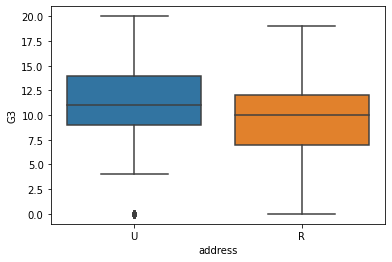

In [12]:
sns.boxplot(data=students, x='address', y='G3')
plt.show()

# Inspecting Overlapping Histograms


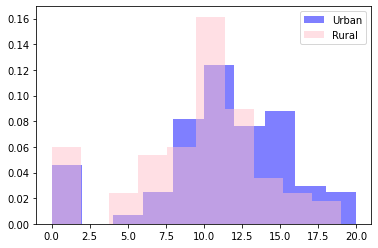

In [14]:
#create the overlapping histograms here:
plt.hist(scores_urban, color='blue', label='Urban', density=True,alpha=0.5)
plt.hist(scores_rural, color='pink', label='Rural', density=True,alpha=0.5)
plt.legend()
plt.show()

#Exploring Non-Binary Categorical Variables


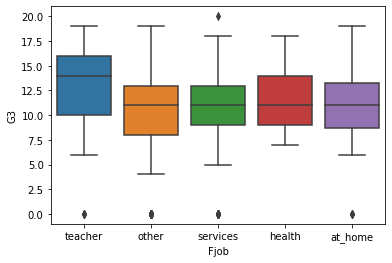

In [15]:
sns.boxplot(data=students, x='Fjob', y='G3')
plt.show()

# Zadanie 1

Przedstaw na wykresie rozrzutu, relację między spożyciem alkoholu w tygodniu (G1) a wiekiem (Age). Dodatkowo, osobnymi kolorami zaznacz w wykresie osoby których rodzice mają ten sam poziom wykształcenia (medu – wykształcenie matki, fedu – wykształcenie ojca).
Dodaj linię trendu do wykresu.

In [16]:
from sklearn.linear_model import LinearRegression
df = pd.read_csv('./student-mat.csv', delimiter=';')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


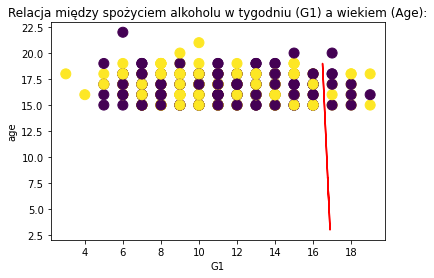

In [17]:
x = df['G1']
y = df['age']

plt.xlabel('G1')
plt.ylabel('age')
plt.title('Relacja między spożyciem alkoholu w tygodniu (G1) a wiekiem (Age):')

model = LinearRegression()
x_ = np.array(x).reshape(-1,1)
y_ = np.array(y).reshape(-1,1)
y.shape
model.fit(x_,y_)
pred = model.predict(x_)
pred = pred.reshape(395)
plt.plot(pred,x, color="red")

plt.scatter(x,y, s=100, c=[df['Medu']==df['Fedu']])

plt.show()

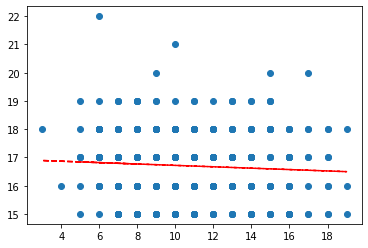

In [18]:
x = df['G1']
y = df['age']
plt.scatter(x,y)

# trendline
x_ = np.array(x).reshape(-1,1)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

# Zadanie 2


Przedstaw histogram wieku osobno dla kobiet i mężczyzn.



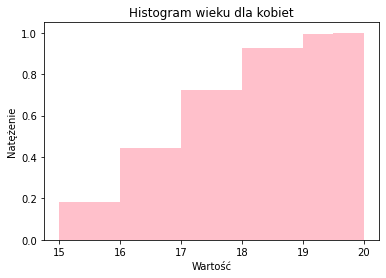

In [19]:
female = df[df["sex"]=="F"]
plt.hist(female['age'], bins=10, cumulative=True, density=True, orientation="vertical", histtype="bar", color="pink")
plt.xlabel("Wartość")
plt.ylabel("Natężenie")
plt.title("Histogram wieku dla kobiet")
plt.show()

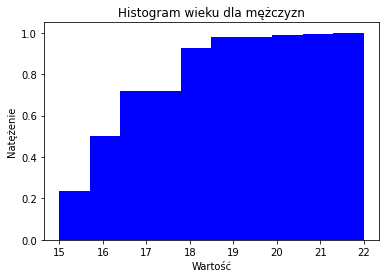

In [20]:
male = df[df["sex"]=="M"]
plt.hist(male['age'], bins=10, cumulative=True, density=True, orientation="vertical", histtype="bar", color="blue")
plt.xlabel("Wartość")
plt.ylabel("Natężenie")
plt.title("Histogram wieku dla mężczyzn")
plt.show()

# Zadanie 3


Kolumna FamSize ma dwie wartości LE3 – 3 lub mniej, GT3 3 – więcej niż 3. Przedstaw za pomocą wykresu słupkowego jak wygląda średnia konsumpcja alkoholu (G1), w podziale na płeć, w obdwu grupach wydzielonych ze względu na FamSize.



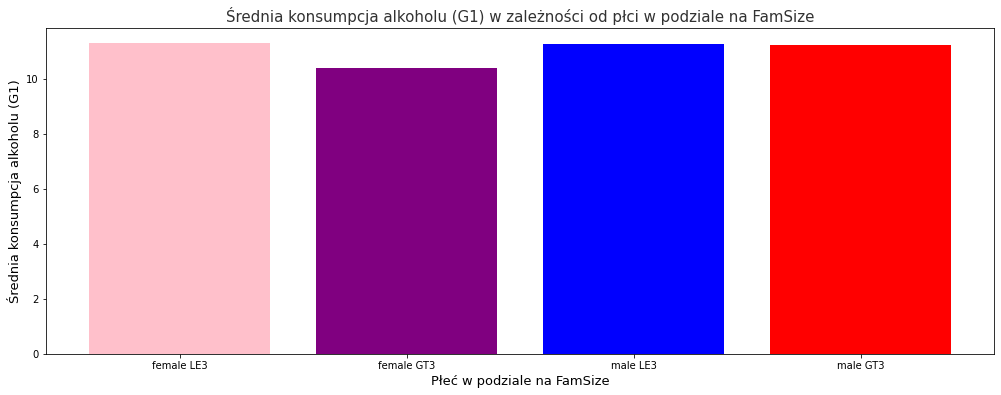

In [21]:
female_le3 = female[female['famsize']=='LE3']['G1']
female_gt3 = female[female['famsize']=='GT3']['G1']

male_le3 = male[male['famsize']=='LE3']['G1']
male_gt3 = male[male['famsize']=='GT3']['G1']

plt.figure(figsize=(17,6))

plt.bar(["female LE3","female GT3"], [female_le3.mean(), female_gt3.mean()], color=["pink","purple"])
plt.bar(["male LE3","male GT3"], [male_le3.mean(), male_gt3.mean()], color=["blue","red"])

plt.title('Średnia konsumpcja alkoholu (G1) w zależności od płci w podziale na FamSize', fontsize=15, color='#323232')
# plt.xlabel('G1', fontsize=12)
plt.ylabel('Średnia konsumpcja alkoholu (G1)',fontsize=13)
plt.xlabel('Płeć w podziale na FamSize',fontsize=13)
plt.show()